In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Download dataset using kaggle API

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

{}

In [ ]:
# initial checking
!ls ~/.kaggle

ls: cannot access '/root/.kaggle': No such file or directory


In [ ]:
# don't run this again unless necessary
!mkdir ~/.kaggle

In [ ]:
!cp '/content/drive/MyDrive/Colab Notebooks/kaggle.json' ~/.kaggle/

In [ ]:
# checking
!ls ~/.kaggle

kaggle.json


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                             title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                          Netflix Movies and TV Shows                        1MB  2024-04-10 09:48:38          17876        390  1.0              
sahirmaharajj/school-student-daily-attendance                   School Student Daily Attendance                    2MB  2024-04-29 19:29:56           4020         87  1.0              
ashishkumarak/amazon-shopping-reviews-daily-updated             Amazon Shopping Reviews [Daily Updated]            7MB  2024-05-13 23:35:11            798         25  1.0              
supriyoain/water-quality-data                                   Water Quali

In [ ]:
# !kaggle datasets list -s "Tomato leaf disease detection" # already download
!kaggle datasets list -s "Plant Disease Classification Merged Dataset"

# alinedobrovsky/plant-disease-classification-merged-dataset # can download dataset

ref                                                         title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -------------------------------------------  ----  -------------------  -------------  ---------  ---------------  
alinedobrovsky/plant-disease-classification-merged-dataset  Plant Disease Classification Merged Dataset  17GB  2023-01-03 15:11:19           4139         52  0.6875           


In [ ]:
# !kaggle datasets download kaustubhb999/tomatoleaf  # already download
# !kaggle datasets download vipoooool/new-plant-diseases-dataset
!kaggle datasets download alinedobrovsky/plant-disease-classification-merged-dataset

Dataset URL: https://www.kaggle.com/datasets/alinedobrovsky/plant-disease-classification-merged-dataset
License(s): CC-BY-NC-SA-4.0
100% 17.3G/17.3G [02:11<00:00, 48.2MB/s]
100% 17.3G/17.3G [02:11<00:00, 141MB/s] 


In [ ]:
!mkdir /content/datasets/

In [ ]:
!unzip plant-disease-classification-merged-dataset.zip -d '/content/datasets/'

Streaming output truncated to the last 5000 lines.
  inflating: /content/datasets/Tomato__yellow_leaf_curl_virus/4adc46cc-60dd-48a7-8d4c-f6394577a14a___UF.GRC_YLCV_Lab 01543.JPG  
  inflating: /content/datasets/Tomato__yellow_leaf_curl_virus/4ae10eb4-cd1f-490e-9ffe-61e348dad2b9___YLCV_GCREC 2785.JPG  
  inflating: /content/datasets/Tomato__yellow_leaf_curl_virus/4ae45072-4db3-477d-9ace-9a08ce483d46___UF.GRC_YLCV_Lab 01407.JPG  
  inflating: /content/datasets/Tomato__yellow_leaf_curl_virus/4ae66de5-2a7a-41bf-b0c3-7c00d2ce3b21___UF.GRC_YLCV_Lab 02136.JPG  
  inflating: /content/datasets/Tomato__yellow_leaf_curl_virus/4af9c16d-2976-48f1-bb9a-bf7a3137488a___UF.GRC_YLCV_Lab 03352.JPG  
  inflating: /content/datasets/Tomato__yellow_leaf_curl_virus/4b0733bc-70fa-46f7-9861-b135a461b67f___YLCV_GCREC 2397.JPG  
  inflating: /content/datasets/Tomato__yellow_leaf_curl_virus/4b2cf9f5-73eb-447d-ac4e-cfab8a228eb9___YLCV_GCREC 2158.JPG  
  inflating: /content/datasets/Tomato__yellow_leaf_curl_virus/4b

## Perform Model Training

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2, DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import ( Dense,
                                      Conv2D,
                                      Flatten,
                                      Dropout,
                                      MaxPooling2D,
                                      GlobalAveragePooling2D )

In [ ]:
# Mengambil dataset dari folder plant-disease-classification-merged-dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Tentukan path ke folder dataset
dataset_path = '/content/datasets/'

# Tentukan kelas yang ingin Anda ambil (misalnya, kelas teh)
classes_to_take = [
    'Tea__algal_leaf',
    'Tea__anthracnose',
    'Tea__bird_eye_spot',
    'Tea__brown_blight',
    'Tea__healthy',
    'Tea__red_leaf_spot'
]

# Tentukan ukuran batch dan ukuran gambar target
batch_size = 32
target_size = (224, 224)

# Buat ImageDataGenerator untuk data training dengan augmentasi
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalisasi
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Proporsi untuk dataset validasi
)
# Buat ImageDataGenerator untuk data validasi tanpa augmentasi, hanya normalisasi
val_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalisasi
    validation_split=0.2  # Proporsi untuk dataset validasi
)

# Memuat dataset dari folder hanya dengan kelas yang Anda pilih untuk data training
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=target_size,
    batch_size=batch_size,
    classes=classes_to_take,  # Hanya mengambil kelas teh
    class_mode='categorical',  # Mode kelas untuk klasifikasi multikelas
    subset='training'  # Subset untuk training
)

# Memuat dataset dari folder hanya dengan kelas yang Anda pilih untuk data validasi
validation_generator = val_datagen.flow_from_directory(
    dataset_path,
    target_size=target_size,
    batch_size=batch_size,
    classes=classes_to_take,  # Hanya mengambil kelas teh
    class_mode='categorical',  # Mode kelas untuk klasifikasi multikelas
    subset='validation'  # Subset untuk validasi
)

Found 1546 images belonging to 6 classes.
Found 383 images belonging to 6 classes.


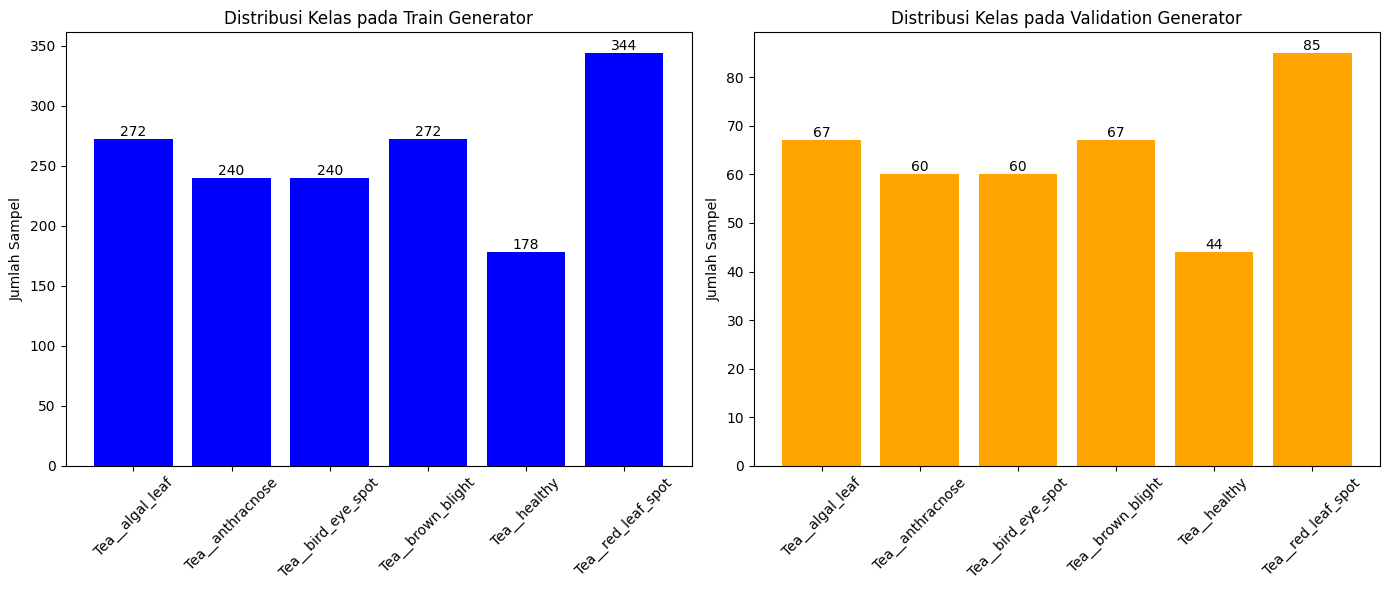

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Mendapatkan jumlah kelas
num_classes = len(train_generator.class_indices)

# Mendapatkan jumlah sampel untuk setiap kelas pada train_generator
train_class_counts = np.sum(train_generator.labels == np.arange(num_classes)[:, None], axis=1)

# Mendapatkan jumlah sampel untuk setiap kelas pada validation_generator
val_class_counts = np.sum(validation_generator.labels == np.arange(num_classes)[:, None], axis=1)

# Label kelas
class_labels = list(train_generator.class_indices.keys())


# Menampilkan distribusi kelas dalam bentuk grafik batang
fig, ax = plt.subplots(1, 2, figsize=(14, 6))


# Train Generator
bars_train = ax[0].bar(class_labels, train_class_counts, color='blue')
ax[0].set_title('Distribusi Kelas pada Train Generator')
ax[0].set_ylabel('Jumlah Sampel')

# Menampilkan angka jumlah sampel di atas setiap bar pada train generator
for bar, count in zip(bars_train, train_class_counts):
    ax[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
                ha='center', va='bottom')


# Validation Generator
bars_val = ax[1].bar(class_labels, val_class_counts, color='orange')
ax[1].set_title('Distribusi Kelas pada Validation Generator')
ax[1].set_ylabel('Jumlah Sampel')

# Menampilkan angka jumlah sampel di atas setiap bar pada validation generator
for bar, count in zip(bars_val, val_class_counts):
    ax[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
                ha='center', va='bottom')


# Rotasi label pada sumbu x
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model


model = load_model('/content/drive/MyDrive/Colab Notebooks/models/tealeavesdisease/model_with_transfer_learning_ver3')

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 48)         1296      ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 48)         192       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 48)         0         ['bn_Conv1[0][0]']      

In [ ]:
print(model.layers[-6]) # tidak usah diubah
print(model.layers[-5]) # tidak usah diubah
print(model.layers[-4]) # tidak usah diubah
########################
print('\n')
########################
print(model.layers[-3])
print(model.layers[-2])
print(model.layers[-1])

In [ ]:
from tensorflow.keras.regularizers import l2

x = model.layers[-3].output
x = Dropout(0.5)(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

model = Model(inputs=model.input, outputs=predictions)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 48)         1296      ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 48)         192       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 48)         0         ['bn_Conv1[0][0]']        

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Example: Adding callbacks such as EarlyStopping or ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Continue training the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50
49/49 [==============================] - 106s 2s/step - loss: 0.6808 - accuracy: 0.7348 - val_loss: 0.5205 - val_accuracy: 0.7990 - lr: 0.0010
Epoch 2/50
49/49 [==============================] - 86s 2s/step - loss: 0.4511 - accuracy: 0.8202 - val_loss: 0.3287 - val_accuracy: 0.8747 - lr: 0.0010
Epoch 3/50
49/49 [==============================] - 84s 2s/step - loss: 0.3158 - accuracy: 0.8765 - val_loss: 0.3451 - val_accuracy: 0.8486 - lr: 0.0010
Epoch 4/50
49/49 [==============================] - 81s 2s/step - loss: 0.2651 - accuracy: 0.8920 - val_loss: 0.3185 - val_accuracy: 0.8642 - lr: 0.0010
Epoch 5/50
49/49 [==============================] - 82s 2s/step - loss: 0.2536 - accuracy: 0.9030 - val_loss: 0.2954 - val_accuracy: 0.8877 - lr: 0.0010
Epoch 6/50
49/49 [==============================] - 88s 2s/step - loss: 0.2282 - accuracy: 0.9101 - val_loss: 0.3203 - val_accuracy: 0.8642 - lr: 0.0010
Epoch 7/50
49/49 [==============================] - 88s 2s/step - loss: 0.2382 - 

In [ ]:
# TRAINING YANG KEDUA
# Example: Adding callbacks such as EarlyStopping or ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Continue training the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50
49/49 [==============================] - 89s 2s/step - loss: 7.2655 - accuracy: 0.5944 - val_loss: 5.2635 - val_accuracy: 0.8042 - lr: 0.0010
Epoch 2/50
49/49 [==============================] - 83s 2s/step - loss: 4.5127 - accuracy: 0.7704 - val_loss: 3.5398 - val_accuracy: 0.8590 - lr: 0.0010
Epoch 3/50
49/49 [==============================] - 92s 2s/step - loss: 3.2331 - accuracy: 0.7917 - val_loss: 2.7033 - val_accuracy: 0.7911 - lr: 0.0010
Epoch 4/50
49/49 [==============================] - 85s 2s/step - loss: 2.4850 - accuracy: 0.8001 - val_loss: 2.0843 - val_accuracy: 0.8642 - lr: 0.0010
Epoch 5/50
49/49 [==============================] - 86s 2s/step - loss: 2.0324 - accuracy: 0.7878 - val_loss: 1.7305 - val_accuracy: 0.8512 - lr: 0.0010
Epoch 6/50
49/49 [==============================] - 82s 2s/step - loss: 1.7301 - accuracy: 0.7878 - val_loss: 1.4724 - val_accuracy: 0.8381 - lr: 0.0010
Epoch 7/50
49/49 [==============================] - 89s 2s/step - loss: 1.4601 - a

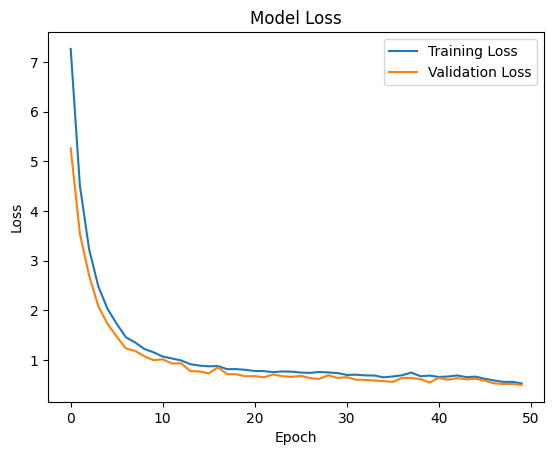

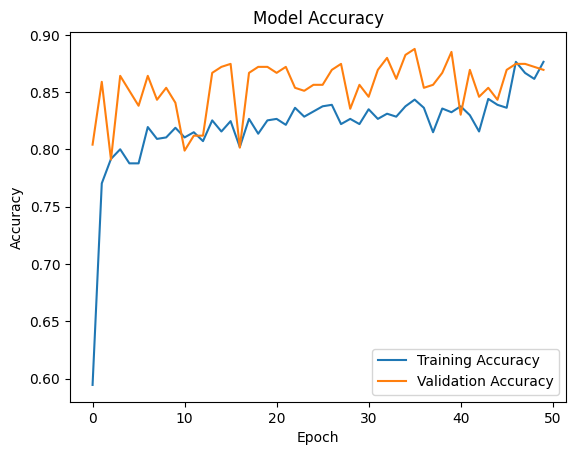

In [ ]:
import matplotlib.pyplot as plt

# Plot loss training dan validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot akurasi training dan validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/models/tealeavesdisease/model_with_transfer_learning_ver4')

#### Ubah ke TFLite

In [ ]:
from keras.models import load_model

model_path = '/content/drive/MyDrive/Colab Notebooks/models/tealeavesdisease/model_with_transfer_learning_ver4'
loaded_model = load_model(model_path)

In [ ]:
import tensorflow as tf

# Tentukan nama file untuk model TFLite yang dihasilkan
tflite_model_name = 'model_with_transfer_learning_ver4.tflite'

# Konversi model menjadi format TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
tflite_model = converter.convert()

# Simpan model TFLite ke file
with open(tflite_model_name, 'wb') as f:
    f.write(tflite_model)

In [ ]:
import shutil

# Direktori tempat Anda ingin menyimpan model TFLite
tflite_model_dir = '/content/drive/MyDrive/Colab Notebooks/models/tealeavesdisease/'

# Pindahkan model TFLite ke direktori yang ditentukan
shutil.move(tflite_model_name, tflite_model_dir)

'/content/drive/MyDrive/Colab Notebooks/models/tealeavesdisease/model_with_transfer_learning_ver4.tflite'